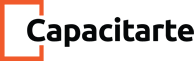

### **Colab Python para Módulo 3**

En este modulo vamos a realizar nuestro primer modelo supervisado para un análisis predictivo de regresión.

Utilizaremos el dataset de Boston Housing, uno de los set de datos mas utilizados para los desafios de Data Science.

En nuestro caso, utilizaremos lo aprendido para intentar predecir el precio de las casas a partir de diversas variables de las mismas.

In [ ]:
## Librerias que vamos a utilizar
import pandas as pd # Link:  https://pandas.pydata.org/
import numpy as np # Link : https://numpy.org/
import sklearn as skl # Link : https://scikit-learn.org/stable/
import seaborn as sns # Link : https://seaborn.pydata.org/
import matplotlib.pyplot as plt # Link: https://matplotlib.org/

# 1. Entendemos el negocio

Boston Housing es un dataset que contiene toda la información relacionada a la vida en Boston, EE.UU, desde su tasa de delitos a la proporcion de comercios e industrias existentes. 

A continuación les dejamos información de las distintas variables:

* CRIM: Tasa de delitos per cápita por ciudad
* ZN: Proporción de tierras residenciales zonificadas para lotes de más de 25.000 pies cuadrados.
* INDUS: Proporción de acres de negocios no minoristas por ciudad
* CHAS: Variable ficticia del río Charles (1 si el área limita con el río; 0 en caso contrario)
* NOX: Concentración de óxidos de nitrógeno (partes por cada 10 millones) [partes/10M]
* RM: Número promedio de habitaciones por vivienda
* AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de empleo en Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX: Tasa de impuestos sobre la propiedad de valor completo por cada $10.000 [$/10k]
* PTRATIO: Proporción de alumnos por maestro por ciudad
* LSTAT: % de población de bajos ingresos

El objetivo o target de este modelo será:

**MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]**

Debemso construir un modelo que permita predecir un **valor de precio**

# 2. Entendemos los datos

In [ ]:
df = pd.read_csv('/content/boston_final.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2

In [ ]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

<Axes: >

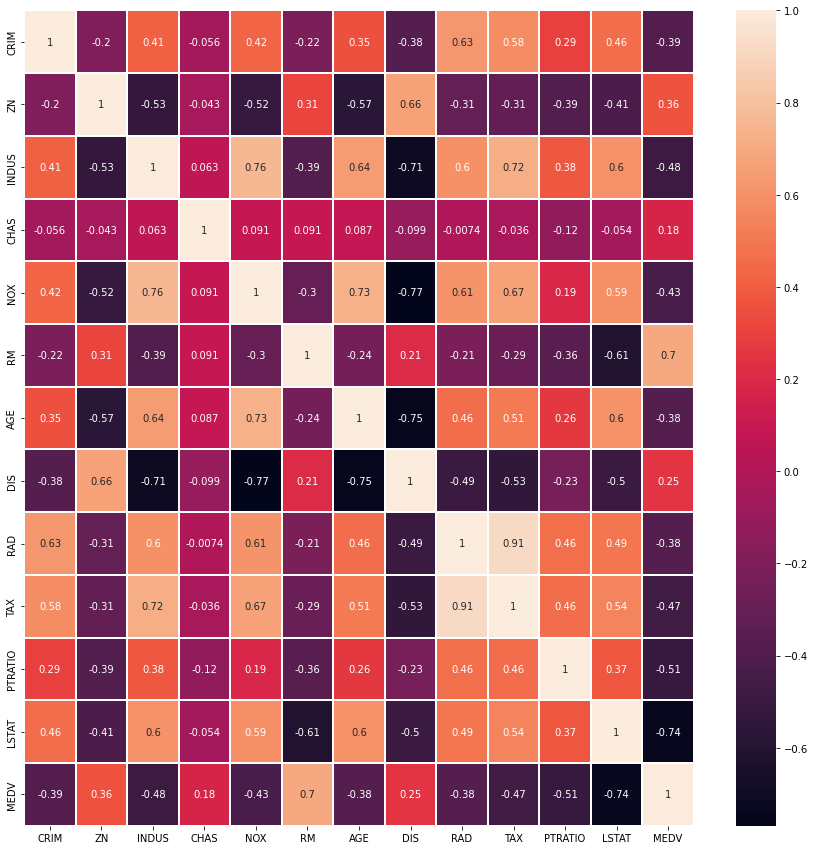

In [ ]:
df_correlacion = df.corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data = df_correlacion, annot = True, linewidths = 0.3, ax = ax)

# 3. Preprocesamiento de los datos

### 3.1 Limpieza de nulls y errores

In [ ]:
# To Do: Contar nulls ('na') y ejecutar un fill -999 si es necesario

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### 3.2 Variables Categóricas

In [ ]:
# To Do: Evaluar cuantas variables categóricas hay. Si existiesen, convertir a números.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


# 4. Entrenamiento

### 4.1 Separacion en Train y Test

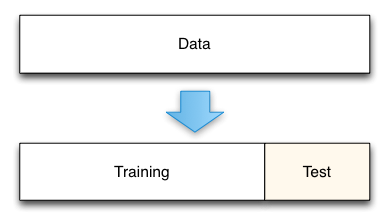

In [ ]:
# Data es DF. Training será el 75% y Test el 25%
# To Do: Separar Variables independientes con nomenclatura "X" y la variable dependiente como "y"

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2

In [ ]:
X = df.drop('MEDV', axis = 1)
X.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  
0     15.3   4.98  
1     17.8   9.14  
2     17.8   4.03  
3     18.7   2.94  
4     18.7   5.33

In [ ]:
y = df.MEDV
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
# To Do: Realizar el train test split con los valores porcentuales mencionados.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [ ]:
print("Shape de X_train: ", X_train.shape)
print("Shape de X_test: ", X_test.shape)
print("Shape de y_train: ", y_train.shape)
print("Shape de y_test: ", y_test.shape)

Shape de X_train:  (379, 12)
Shape de X_test:  (127, 12)
Shape de y_train:  (379,)
Shape de y_test:  (127,)


In [ ]:
X_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
243   0.12757  30.0   4.93     0  0.428  6.393   7.8  7.0355    6  300.0   
397   7.67202   0.0  18.10     0  0.693  5.747  98.9  1.6334   24  666.0   
121   0.07165   0.0  25.65     0  0.581  6.004  84.1  2.1974    2  188.0   
290   0.03502  80.0   4.95     0  0.411  6.861  27.9  5.1167    4  245.0   
478  10.23300   0.0  18.10     0  0.614  6.185  96.7  2.1705   24  666.0   

     PTRATIO  LSTAT  
243     16.6   5.19  
397     20.2  19.92  
121     19.1  14.27  
290     19.2   3.33  
478     20.2  18.03

In [ ]:
y_train

243    23.7
397     8.5
121    20.3
290    28.5
478    14.6
       ... 
337    18.5
91     22.0
80     28.0
191    30.5
409    27.5
Name: MEDV, Length: 379, dtype: float64

### 4.2 Eleccion del algoritmo

Existen multiples algoritmos para realizar problemas de regresión. La más famosa es la regresión lineal que permite encontrar relaciones entre variables, con el fin de explicar la variable dependiente o target. El objetivo es construir una línea recta que recorra los puntos de datos y minimice el error con cada uno.

En regresión también se pueden utilizar arboles de decision para realizar regresiones o utilizar algoritmos de boosting y bagging como vimos en nuestro módulo teórico.

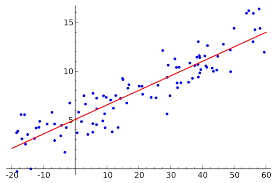

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# To Do: Crear un algoritmo de Linear Regression sin parámetros

In [ ]:
regresion = LinearRegression()

In [ ]:
# To Do: Entrenar la regresion lineal con el set de datos de entrenamiento

In [ ]:
regresion.fit(X_train, y_train)

LinearRegression()

In [ ]:
# To Do: Realizar una predicción sobre X_test y luego armar una columna con los resultados
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
53    0.04981  21.0   5.64     0  0.439  5.998  21.4  6.8147    4  243.0   
490   0.20746   0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711.0   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300.0   
375  19.60910   0.0  18.10     0  0.671  7.313  97.9  1.3163   24  666.0   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666.0   

     PTRATIO  LSTAT  
53      16.8   8.43  
490     20.1  29.68  
240     16.6  11.38  
375     20.2  13.44  
417     20.2  26.64

In [ ]:
# To Do: Realizar una predicción sobre X_test y luego armar una columna con los resultados
X_test['y_pred'] = regresion.predict(X_test)
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
53    0.04981  21.0   5.64     0  0.439  5.998  21.4  6.8147    4  243.0   
490   0.20746   0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711.0   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300.0   
375  19.60910   0.0  18.10     0  0.671  7.313  97.9  1.3163   24  666.0   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666.0   

     PTRATIO  LSTAT     y_pred  
53      16.8   8.43  23.685824  
490     20.1  29.68   3.391889  
240     16.6  11.38  27.674639  
375     20.2  13.44  24.922003  
417     20.2  26.64   8.170460

### 4.3 Interpretación y evaluación de resultados

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

Existen distintos tipos de métricas, segun el dataset, el problema y la tolerancia al error que tengamos. 

Dos de las más utilizadas son el R2 y el MAE.

- R2 es un coeficiente que indica cuanta volatilidad de los datos pueden ser explicados por el modelo. Este dato va de 0 a 1, y cuanto más se acerque a 1, mejor será el algortimo que hayamos entrenado.

- MAE es el valor absoluto medio mide la media de las diferencias absolutas entre los valores predichos y los valores reales. Es muy util para dataset donde los targets no estén normalmente distribuidos.

In [ ]:
X_test['y_real'] = y_test
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
53    0.04981  21.0   5.64     0  0.439  5.998  21.4  6.8147    4  243.0   
490   0.20746   0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711.0   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300.0   
375  19.60910   0.0  18.10     0  0.671  7.313  97.9  1.3163   24  666.0   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666.0   

     PTRATIO  LSTAT     y_pred  y_real  
53      16.8   8.43  23.685824    23.4  
490     20.1  29.68   3.391889     8.1  
240     16.6  11.38  27.674639    22.0  
375     20.2  13.44  24.922003    15.0  
417     20.2  26.64   8.170460    10.4

In [ ]:
X_test['error'] = abs(X_test.y_real - X_test.y_pred)
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
53    0.04981  21.0   5.64     0  0.439  5.998  21.4  6.8147    4  243.0   
490   0.20746   0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711.0   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300.0   
375  19.60910   0.0  18.10     0  0.671  7.313  97.9  1.3163   24  666.0   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666.0   

     PTRATIO  LSTAT     y_pred  y_real     error  
53      16.8   8.43  23.685824    23.4  0.285824  
490     20.1  29.68   3.391889     8.1  4.708111  
240     16.6  11.38  27.674639    22.0  5.674639  
375     20.2  13.44  24.922003    15.0  9.922003  
417     20.2  26.64   8.170460    10.4  2.229540

In [ ]:
X_test.error.mean()

3.4456100959564955

In [ ]:
print("Y_real minimo:", str(X_test.y_real.min()))
print("Y_real máximo:", str(X_test.y_real.max()))

Y_real minimo: 5.6
Y_real máximo: 50.0


In [ ]:
# To Do: Realizar evaluacion con R2
r2_score(X_test.y_real, X_test.y_pred)

0.6890707203825819

In [ ]:
# To Do: Realizar evaluacion con MAE (Error absoluto medio)
mean_absolute_error(X_test.y_real, X_test.y_pred)

3.4456100959564955

### ¿Que podemos hacer con el modelo entrenado?

- Continuar haciendo iteraciones aumentando o reduciendo la cantidad de variables predictoras en X
- Probar otros algoritmos como el DecisionTreeRegressor
- Utilizarlo con datasets nuevos, sin volver a entrenar, realizando una predicción tolerando el error medio calculado previamente